In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [22]:
house_size = np.array([12.0, 14.0, 20.0, 20.0, 22.0, 30.0, 31.0, 40.0, 41.0])
house_price = np.array([90.0, 89.0, 92.0, 90.0, 100.0, 110.0, 105.0, 150.0, 140.0])

In [23]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        yHat = w * x[i] + b
        cost += (yHat - y[i])**2

    total_cost = (1/2*m)*cost
    return total_cost

In [24]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0
    for i in range(m):
        cost = (((w*x[i]) + b) - y[i])
        dj_dw += cost * x[i]
        dj_db += cost

    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

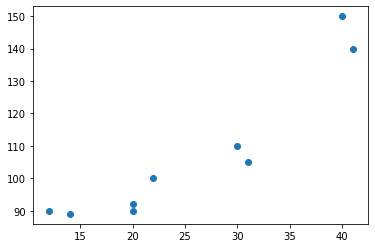

In [25]:
plt.scatter(house_size, house_price)

In [47]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    j_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        j_history.append(cost_function(x, y, w, b))
        p_history.append([w,b])
        
        if i % 100 == 0:
            print(f"iteration {i}: cost {j_history[-1]:0.2e} dj_dw:{dj_dw:0.3e}, dj_db:{dj_db:0.3e}, w:{w:0.3e}, b:{b:0.5e}")

    return w, b, j_history, p_history

In [50]:
w_init = 0
b_init = 0
iterations = 100000
tmp_alpha = 0.001

w_final, b_final, J_hist, p_hist = gradient_descent(house_size ,house_price, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")
print(f"w:{w_final}, b:{b_final}")

iteration 0: cost 4.79e+04 dj_dw:-2.940e+03, dj_db:-1.073e+02, w:2.940e+00, b:1.07333e-01
iteration 100: cost 1.89e+04 dj_dw:2.471e-01, dj_db:-7.267e+00, w:3.882e+00, b:8.71607e-01
iteration 200: cost 1.85e+04 dj_dw:2.438e-01, dj_db:-7.172e+00, w:3.857e+00, b:1.59350e+00
iteration 300: cost 1.81e+04 dj_dw:2.407e-01, dj_db:-7.079e+00, w:3.833e+00, b:2.30598e+00
iteration 400: cost 1.77e+04 dj_dw:2.375e-01, dj_db:-6.986e+00, w:3.809e+00, b:3.00918e+00
iteration 500: cost 1.73e+04 dj_dw:2.344e-01, dj_db:-6.895e+00, w:3.785e+00, b:3.70323e+00
iteration 600: cost 1.69e+04 dj_dw:2.314e-01, dj_db:-6.806e+00, w:3.762e+00, b:4.38823e+00
iteration 700: cost 1.66e+04 dj_dw:2.284e-01, dj_db:-6.717e+00, w:3.739e+00, b:5.06430e+00
iteration 800: cost 1.62e+04 dj_dw:2.254e-01, dj_db:-6.629e+00, w:3.716e+00, b:5.73157e+00
iteration 900: cost 1.59e+04 dj_dw:2.225e-01, dj_db:-6.543e+00, w:3.694e+00, b:6.39014e+00
iteration 1000: cost 1.55e+04 dj_dw:2.196e-01, dj_db:-6.458e+00, w:3.672e+00, b:7.04014e+00

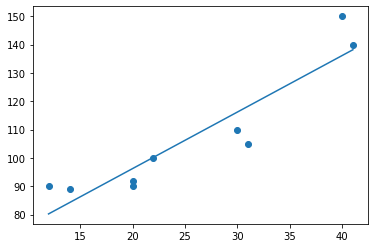

In [51]:
def linear_func(m, x, b):
    return m*x + b

yhats = linear_func(w_final, house_size, b_final)
plt.plot(house_size, yhats)
plt.scatter(house_size, house_price)